In [1]:
import pyspark

from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [2]:
spark = SparkSession.builder.master('local[2]').appName('Sunny').getOrCreate()
spark

In [4]:
data = spark.read.csv('iris.csv', header = True, inferSchema = True)

In [5]:
data.show()

+-------------+------------+-------------+------------+-------+
|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|Species|
+-------------+------------+-------------+------------+-------+
|          5.1|         3.5|          1.4|         0.2| setosa|
|          4.9|         3.0|          1.4|         0.2| setosa|
|          4.7|         3.2|          1.3|         0.2| setosa|
|          4.6|         3.1|          1.5|         0.2| setosa|
|          5.0|         3.6|          1.4|         0.2| setosa|
|          5.4|         3.9|          1.7|         0.4| setosa|
|          4.6|         3.4|          1.4|         0.3| setosa|
|          5.0|         3.4|          1.5|         0.2| setosa|
|          4.4|         2.9|          1.4|         0.2| setosa|
|          4.9|         3.1|          1.5|         0.1| setosa|
|          5.4|         3.7|          1.5|         0.2| setosa|
|          4.8|         3.4|          1.6|         0.2| setosa|
|          4.8|         3.0|          1.

In [6]:
pd_df = data.toPandas()

In [7]:
pd_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
pd_df.shape

(150, 5)

In [9]:
pd_df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
pd_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
pd_df['Species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: Species, dtype: int64

In [13]:
pd_df['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (14,8)

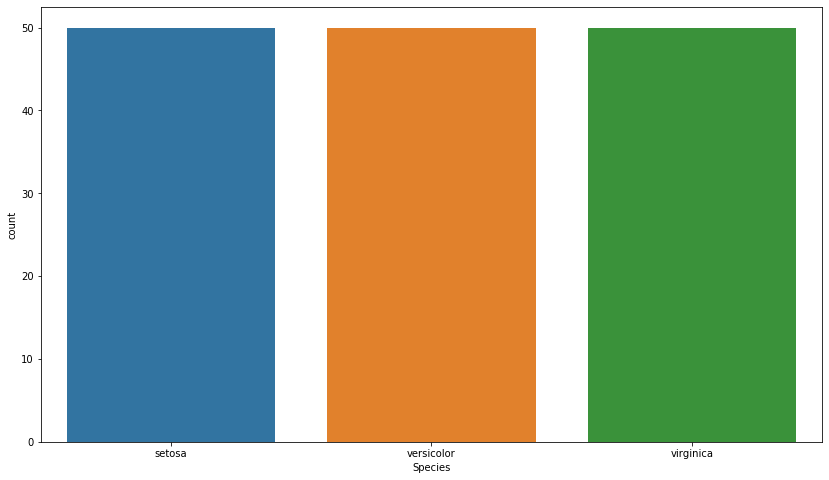

In [16]:
sns.countplot(pd_df['Species'])

In [17]:
pd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


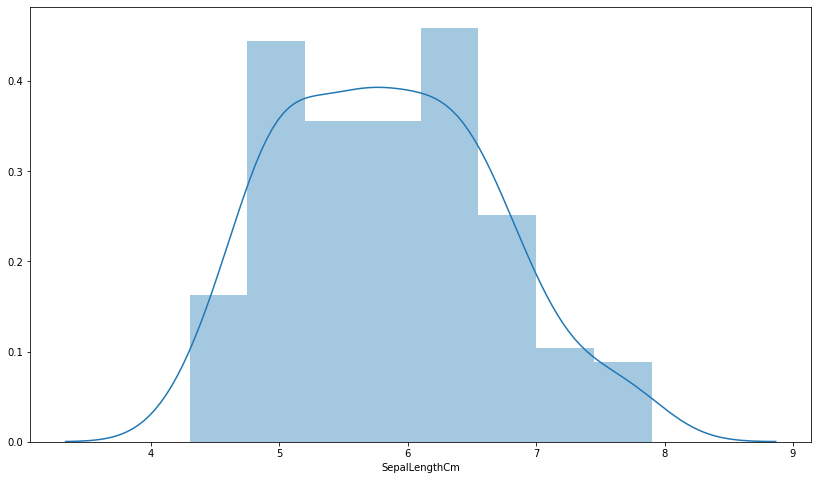

In [18]:
sns.distplot(pd_df['SepalLengthCm'])

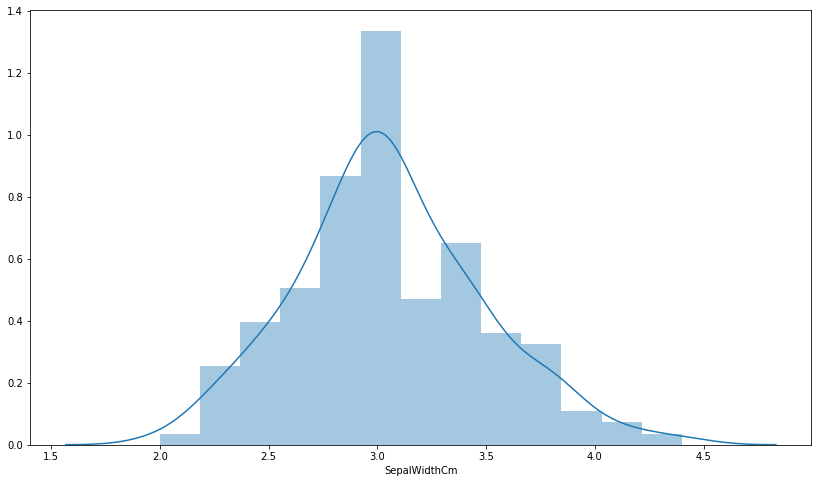

In [19]:
sns.distplot(pd_df['SepalWidthCm'])

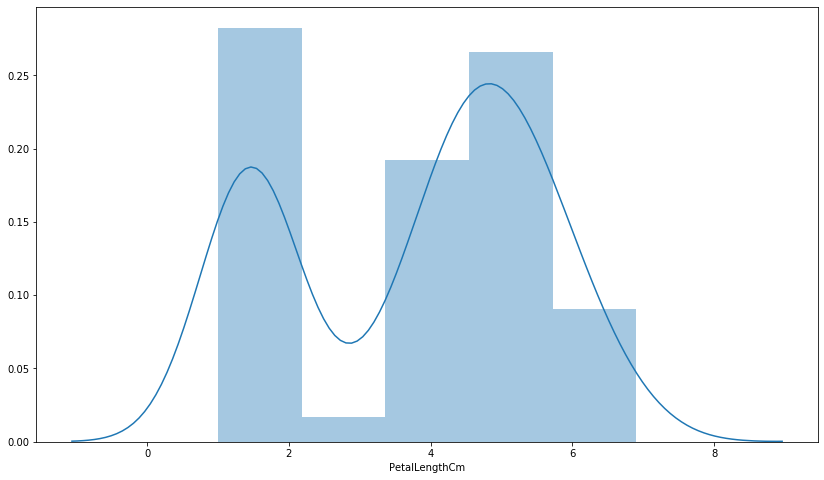

In [20]:
sns.distplot(pd_df['PetalLengthCm'])

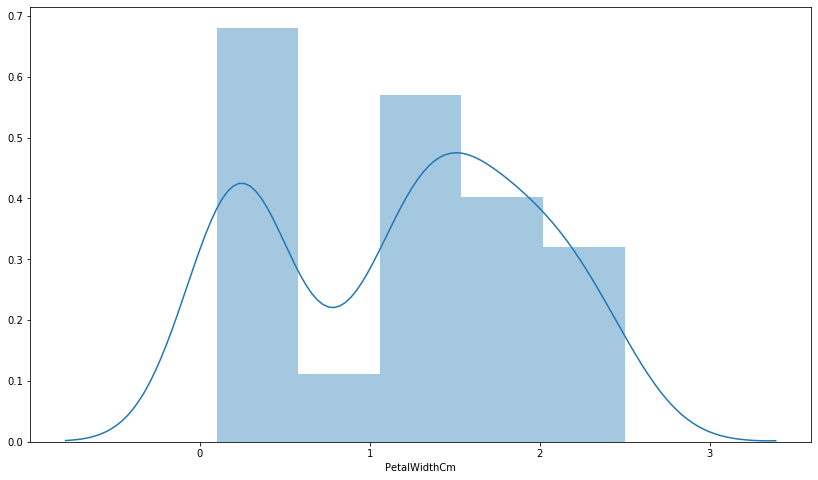

In [21]:
sns.distplot(pd_df['PetalWidthCm'])

In [22]:
pd_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [27]:

from pyspark.ml.feature import VectorAssembler

In [25]:

from pyspark.ml.feature import StringIndexer

label_stringIdx = StringIndexer(inputCol = 'Species', outputCol = 'labelIndex')
data = label_stringIdx.fit(data).transform(data)
data.show()

+-------------+------------+-------------+------------+-------+----------+
|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|Species|labelIndex|
+-------------+------------+-------------+------------+-------+----------+
|          5.1|         3.5|          1.4|         0.2| setosa|       2.0|
|          4.9|         3.0|          1.4|         0.2| setosa|       2.0|
|          4.7|         3.2|          1.3|         0.2| setosa|       2.0|
|          4.6|         3.1|          1.5|         0.2| setosa|       2.0|
|          5.0|         3.6|          1.4|         0.2| setosa|       2.0|
|          5.4|         3.9|          1.7|         0.4| setosa|       2.0|
|          4.6|         3.4|          1.4|         0.3| setosa|       2.0|
|          5.0|         3.4|          1.5|         0.2| setosa|       2.0|
|          4.4|         2.9|          1.4|         0.2| setosa|       2.0|
|          4.9|         3.1|          1.5|         0.1| setosa|       2.0|
|          5.4|         3

In [36]:
VA_vect = VectorAssembler(inputCols = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'], outputCol = 'features')


data = VA_vect.transform(data)

In [38]:
train,test = data.randomSplit([0.8,0.2], seed = 13)


print("dim of data DF :",(data.count(),len(data.columns)))

print("dim of Train DF :",(train.count(),len(train.columns)))

print("dim of Test DF :",(test.count(),len(test.columns)))

dim of data DF : (150, 8)
dim of Train DF : (121, 8)
dim of Test DF : (29, 8)


In [37]:
from pyspark.ml.classification import RandomForestClassifier

In [39]:
rfc = RandomForestClassifier(featuresCol = 'features',labelCol = 'labelIndex')

rfc_model = rfc.fit(train)

In [41]:
pred_train_rfc = rfc_model.transform(train)

In [42]:
pred_test_rfc = rfc_model.transform(test)

In [44]:
pred_train_rfc.select('features','labelIndex','prediction').show()

+-----------------+----------+----------+
|         features|labelIndex|prediction|
+-----------------+----------+----------+
|[4.3,3.0,1.1,0.1]|       2.0|       2.0|
|[4.4,3.0,1.3,0.2]|       2.0|       2.0|
|[4.4,3.2,1.3,0.2]|       2.0|       2.0|
|[4.6,3.1,1.5,0.2]|       2.0|       2.0|
|[4.6,3.2,1.4,0.2]|       2.0|       2.0|
|[4.6,3.4,1.4,0.3]|       2.0|       2.0|
|[4.6,3.6,1.0,0.2]|       2.0|       2.0|
|[4.7,3.2,1.3,0.2]|       2.0|       2.0|
|[4.7,3.2,1.6,0.2]|       2.0|       2.0|
|[4.8,3.0,1.4,0.1]|       2.0|       2.0|
|[4.8,3.0,1.4,0.3]|       2.0|       2.0|
|[4.8,3.1,1.6,0.2]|       2.0|       2.0|
|[4.8,3.4,1.6,0.2]|       2.0|       2.0|
|[4.8,3.4,1.9,0.2]|       2.0|       2.0|
|[4.9,2.4,3.3,1.0]|       0.0|       0.0|
|[4.9,3.0,1.4,0.2]|       2.0|       2.0|
|[4.9,3.1,1.5,0.1]|       2.0|       2.0|
|[4.9,3.1,1.5,0.2]|       2.0|       2.0|
|[4.9,3.6,1.4,0.1]|       2.0|       2.0|
|[5.0,2.0,3.5,1.0]|       0.0|       0.0|
+-----------------+----------+----

In [45]:
pred_test_rfc.select('features','labelIndex','prediction').show()

+-----------------+----------+----------+
|         features|labelIndex|prediction|
+-----------------+----------+----------+
|[4.4,2.9,1.4,0.2]|       2.0|       2.0|
|[4.5,2.3,1.3,0.3]|       2.0|       2.0|
|[4.9,2.5,4.5,1.7]|       1.0|       0.0|
|[5.0,3.0,1.6,0.2]|       2.0|       2.0|
|[5.0,3.5,1.6,0.6]|       2.0|       2.0|
|[5.1,2.5,3.0,1.1]|       0.0|       0.0|
|[5.3,3.7,1.5,0.2]|       2.0|       2.0|
|[5.6,2.7,4.2,1.3]|       0.0|       0.0|
|[5.8,2.7,4.1,1.0]|       0.0|       0.0|
|[5.8,2.7,5.1,1.9]|       1.0|       1.0|
|[5.8,2.8,5.1,2.4]|       1.0|       1.0|
|[5.8,4.0,1.2,0.2]|       2.0|       2.0|
|[6.1,2.8,4.7,1.2]|       0.0|       0.0|
|[6.1,3.0,4.9,1.8]|       1.0|       1.0|
|[6.2,2.2,4.5,1.5]|       0.0|       0.0|
|[6.3,2.3,4.4,1.3]|       0.0|       0.0|
|[6.3,2.5,4.9,1.5]|       0.0|       1.0|
|[6.3,3.3,6.0,2.5]|       1.0|       1.0|
|[6.4,2.7,5.3,1.9]|       1.0|       1.0|
|[6.4,3.2,5.3,2.3]|       1.0|       1.0|
+-----------------+----------+----

In [47]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="labelIndex", predictionCol="prediction")
accuracy_train = evaluator.evaluate(pred_train_rfc)
print("Train Data Accuracy = %s" % (accuracy_train))
print("Train Data Test Error = %s" % (1.0 - accuracy_train))

Train Data Accuracy = 0.9834710743801652
Train Data Test Error = 0.016528925619834767


In [49]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="labelIndex", predictionCol="prediction")
accuracy_test = evaluator.evaluate(pred_test_rfc)
print("Test Data Accuracy = %s" % (accuracy_test))
print("Test Data Test Error = %s" % (1.0 - accuracy_test))

Test Data Accuracy = 0.9310344827586207
Test Data Test Error = 0.06896551724137934


In [50]:
from pyspark.ml.classification import DecisionTreeClassifier

In [51]:
dtc = DecisionTreeClassifier(featuresCol = 'features',labelCol = 'labelIndex')


dtc_model = dtc.fit(train)

In [52]:
pred_train_dtc = dtc_model.transform(train)

In [53]:
pred_test_dtc = dtc_model.transform(test)

In [54]:
pred_train_dtc.select('features','labelIndex','prediction').show()

+-----------------+----------+----------+
|         features|labelIndex|prediction|
+-----------------+----------+----------+
|[4.3,3.0,1.1,0.1]|       2.0|       2.0|
|[4.4,3.0,1.3,0.2]|       2.0|       2.0|
|[4.4,3.2,1.3,0.2]|       2.0|       2.0|
|[4.6,3.1,1.5,0.2]|       2.0|       2.0|
|[4.6,3.2,1.4,0.2]|       2.0|       2.0|
|[4.6,3.4,1.4,0.3]|       2.0|       2.0|
|[4.6,3.6,1.0,0.2]|       2.0|       2.0|
|[4.7,3.2,1.3,0.2]|       2.0|       2.0|
|[4.7,3.2,1.6,0.2]|       2.0|       2.0|
|[4.8,3.0,1.4,0.1]|       2.0|       2.0|
|[4.8,3.0,1.4,0.3]|       2.0|       2.0|
|[4.8,3.1,1.6,0.2]|       2.0|       2.0|
|[4.8,3.4,1.6,0.2]|       2.0|       2.0|
|[4.8,3.4,1.9,0.2]|       2.0|       2.0|
|[4.9,2.4,3.3,1.0]|       0.0|       0.0|
|[4.9,3.0,1.4,0.2]|       2.0|       2.0|
|[4.9,3.1,1.5,0.1]|       2.0|       2.0|
|[4.9,3.1,1.5,0.2]|       2.0|       2.0|
|[4.9,3.6,1.4,0.1]|       2.0|       2.0|
|[5.0,2.0,3.5,1.0]|       0.0|       0.0|
+-----------------+----------+----

In [55]:
pred_test_dtc.select('features','labelIndex','prediction').show()

+-----------------+----------+----------+
|         features|labelIndex|prediction|
+-----------------+----------+----------+
|[4.4,2.9,1.4,0.2]|       2.0|       2.0|
|[4.5,2.3,1.3,0.3]|       2.0|       2.0|
|[4.9,2.5,4.5,1.7]|       1.0|       0.0|
|[5.0,3.0,1.6,0.2]|       2.0|       2.0|
|[5.0,3.5,1.6,0.6]|       2.0|       2.0|
|[5.1,2.5,3.0,1.1]|       0.0|       0.0|
|[5.3,3.7,1.5,0.2]|       2.0|       2.0|
|[5.6,2.7,4.2,1.3]|       0.0|       0.0|
|[5.8,2.7,4.1,1.0]|       0.0|       0.0|
|[5.8,2.7,5.1,1.9]|       1.0|       1.0|
|[5.8,2.8,5.1,2.4]|       1.0|       1.0|
|[5.8,4.0,1.2,0.2]|       2.0|       2.0|
|[6.1,2.8,4.7,1.2]|       0.0|       0.0|
|[6.1,3.0,4.9,1.8]|       1.0|       1.0|
|[6.2,2.2,4.5,1.5]|       0.0|       0.0|
|[6.3,2.3,4.4,1.3]|       0.0|       0.0|
|[6.3,2.5,4.9,1.5]|       0.0|       1.0|
|[6.3,3.3,6.0,2.5]|       1.0|       1.0|
|[6.4,2.7,5.3,1.9]|       1.0|       1.0|
|[6.4,3.2,5.3,2.3]|       1.0|       1.0|
+-----------------+----------+----

In [56]:
evaluator = MulticlassClassificationEvaluator(labelCol="labelIndex", predictionCol="prediction")
accuracy_train_dtc = evaluator.evaluate(pred_train_dtc)
print("Train Data Accuracy = %s" % (accuracy_train_dtc))
print("Train Data Test Error = %s" % (1.0 - accuracy_train_dtc))

Train Data Accuracy = 0.9917355371900826
Train Data Test Error = 0.008264462809917439


In [57]:
evaluator = MulticlassClassificationEvaluator(labelCol="labelIndex", predictionCol="prediction")
accuracy_test_dtc = evaluator.evaluate(pred_test_dtc)
print("Train Data Accuracy = %s" % (accuracy_test_dtc))
print("Train Data Test Error = %s" % (1.0 - accuracy_test_dtc))

Train Data Accuracy = 0.9310344827586207
Train Data Test Error = 0.06896551724137934
